In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt

#### We start by reading the case study file.

In [2]:
df = pd.read_csv("C:\\Users\\Supraja Sriraman\\Desktop\\BA Project\\HousingData.csv")

#### From the given case study we have a set of features that describes a house in Boston and we have to predict the house price. In this dataset each row decribes a Boston town or suburb. The given features are
#### CRIM- per capita crime rate by town
#### ZN- proportion of residential land zoned for lots over 25,000 sq.ft.
#### INDUS- proportion of non-retail business acres per town
#### CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX- nitric oxides concentration (parts per 10 million)
#### RM- average number of rooms per dwelling
#### AGE- proportion of owner-occupied units built prior to 1940
#### DIS- weighted distances to five Boston employment centres
#### RAD- index of accessibility to radial highways
#### TAX- full-value property-tax rate per 10,000usd
#### PTRATIO- pupil-teacher ratio by town
#### B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### LSTAT- % lower status of the population
#### Our target variable is MEDV- median value of owner-occupied homes in 1000usd.

## Exploratory Data Analysis (EDA)

#### Given below is the first 5 rows in the data which helps us to get a quick idea if we have the right set of data.

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

#### Given below is the Descriptive Statistics for the given data and gives the count, mean, min, max, standard deviation and quartiles for all the variables.
#### Two data coulmns show interesting summaries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560262   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Missing Value Treatment
#### We now check for the presence of null values in the data. We find that CRIM, ZN, INDUS, CHAS, AGE and LSTAT have null values and it is present in 20 different rows.

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

#### We now perform the missing value imputation, we substitute the missing values present in the dataset with another computed values to avoid inconsistent results and since imputation gives better results than just dropping the variables. We substitute the missing values in CRIM, AGE & LSTAT with the mean of the respective variables, since it has the benefit of not changing the sample mean for the variables and is a reasonable estimate for a randomly selected observation. We substitute the missing values in ZN & CHAS with 0. We use forward fill to substitute for missing values in INDUS because we observe that there is a pattern of similar values in the dataset around the missing values and this will give a better idea of the dataset.

In [6]:
df['CRIM']=df['CRIM'].fillna((df['CRIM'].mean()))

In [7]:
df['AGE']=df['AGE'].fillna((df['AGE'].mean()))

In [8]:
df['ZN']= df['ZN'].fillna(0)

In [9]:
df['INDUS'] = df['INDUS'].fillna(method='ffill')

In [10]:
df['LSTAT']=df['LSTAT'].fillna((df['LSTAT'].mean()))

In [11]:
df['CHAS']= df['CHAS'].fillna(0)

#### Next we find the presence of unique values for all the variables. We see that CRIM has the highest number of unique values whereas CHAS has the lowest number of unique values. CHAS has the least number of unique values because it is a dummy variable and contains the values 0 & 1 only.

In [12]:
df.nunique()

CRIM       485
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        349
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      439
MEDV       229
dtype: int64

#### We get the column wise variable names for the dataset and the datatype as object which represents all others apart from int, bool, float, complex, bytes, str & buffer.

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### Now we look at the correlation matrix to find the relationship between any two variables at a time. Negative sign shows an inverse relationship between the variables and positive sign shows a direct relationship. We observe that CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO & LSTAT have a negative relationship with MEDV and LSTAT has the strongest negative relationship with MEDV. This implies that when the values of these features are low(high), value of MEDV is high(low). For example, if CRIM(Crime rate in an area) is low there will be higher prices of houses in that area. Another example that can be seen is an individual will pay higher price for an area which has lower concentrations of nitric oxides. Similarly, it is true for all the variables. An individual will be ready to pay higher price if presence of these feature variables are low.
#### Now we see that MEDV has a positive relationship with ZN, CHAS, RM, DIS & B. This implies that lower(higher) values of these feature variables bring a lower(higher) change in the target variable. RM & ZN have the strongest positive relationship with MEDV among all the other variables. This is theoretically true as well. For example, if RM (average number of rooms for dwelling) is high, an individual will be ready to pay a higher price for it. Similarly it holds for all the other variables.

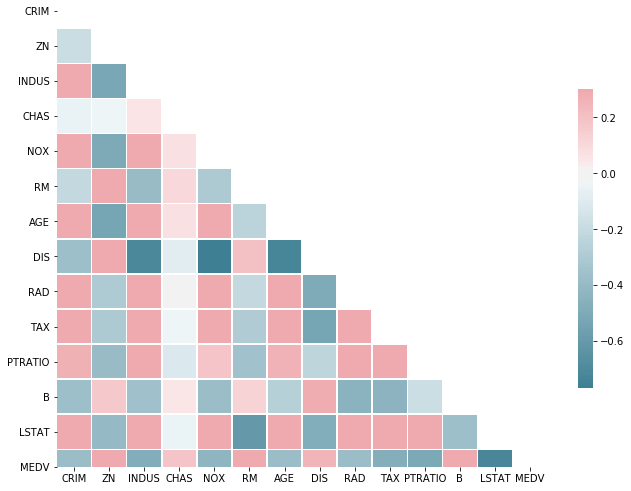

In [14]:
# Let us get the correlation in the data

# Compute the correlation matrix
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Plotted below is a heatmap which is nothing but the numeric representation of the correlation matrix. It shows the correlation coefficient for any two variables. The values range from -0.8-1.0 and is represented by range of colors. We observe that our dependent variable MEDV is strongly correlated to RM & LSTAT. Also, RAD & TAX are strongly correlated , so we don't include it in our features to avoid multicollinearity. We also observe that MEDV has a negative relationship with CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO & LSTAT whereas has a positive relationship with ZN, CHAS, RM, DIS & B. These results are evident from the negative and positive values present in the heatmap. RM has the highest positive value which is 0.7 & LSTAT has the lowest negative value which is -0.72.This implies that these two variables have the strongest impact on our target variable.

In [15]:
correlation_matrix = df.corr().round(2)

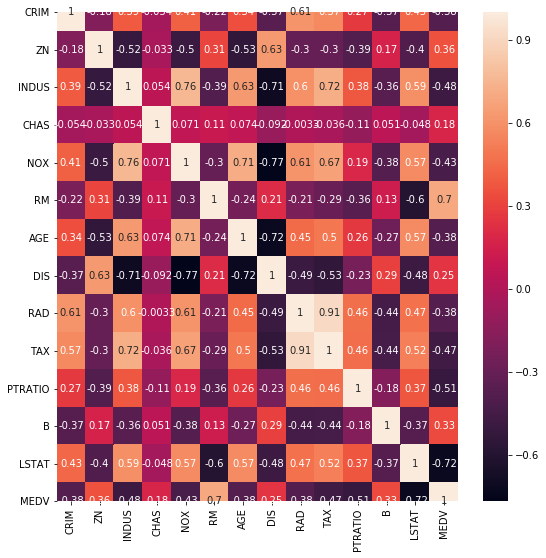

In [16]:
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(), annot = True)

#### Using boxplots we try to find the presence of outliers in the data. Outliers are unusually small or large observations that can have a disproportionate effect on the statistical results, such as mean, which can lead into misleading interpretations. Hence, it is important to look into them and treat them.
#### From the boxplot we observe that there is a presence of outliers in the variable LSTAT and it is due to the presence of unusually large variables. LSTAT is symmetric and has approximately normal distributioni.e., its measures of central tendency are equal, mean=median.

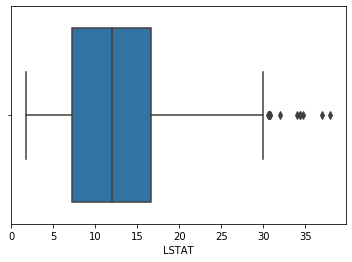

In [17]:
sns.boxplot(df['LSTAT'])

#### From the boxplot we observe that outliers are not present for the variable AGE. But, it is positively skewed, i.e., right tailed, which tells us that majority of the data is accumulated towards the left side or towards the lower values. Also, mean > median.

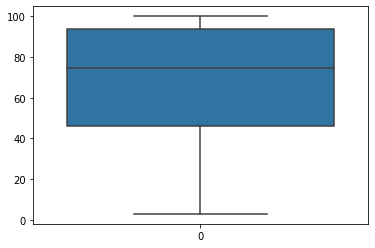

In [18]:
sns.boxplot(data = df['AGE'])

#### From the boxplot we observe that outliers are present for the variable RM and it is due to the prsence of both unusually small and large variables in the dataset. Also, it is positively skewed, i.e., right tailed, which tells us that majority of the data is accumulated towards the left side or towards the lower values. Also, mean > median.

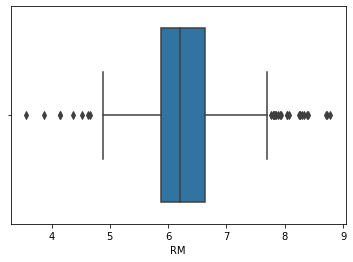

In [19]:
sns.boxplot(df['RM'])

#### From the boxplot we observe that outliers are not present for the variable TAX. But, it is positively skewed, i.e., right tailed, which tells us that majority of the data is accumulated towards the left side or towards the lower values. Also, mean > median.

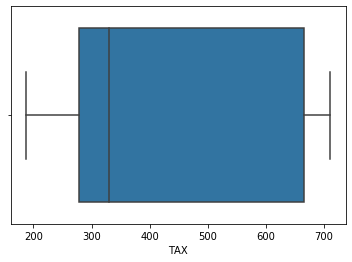

In [20]:
sns.boxplot(df['TAX'])

#### From the boxplot we observe that outliers are not present for the variable INDUS. But, it is positively skewed, i.e., right tailed, which tells us that majority of the data is accumulated towards the left side or towards the lower values. Also, mean > median.


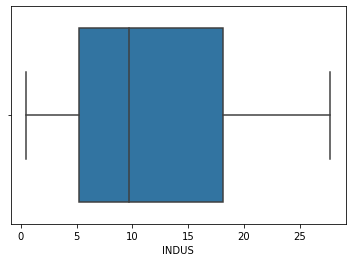

In [21]:
sns.boxplot(df['INDUS'])

#### From the boxplot we observe that outliers are present for our target variable MEDV and it is due to the prsence of unsually large & small values in the dataset. But, it is symmetric and follows approximately normal distribution, which means that its measures of central tendency are equal, mean = median.

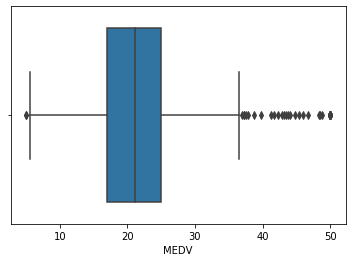

In [22]:
sns.boxplot(df['MEDV'])

#### From the boxplot we observe that outliers are present for the variable PTRATIO due to unusually small values in the dataset. Also, it is negatively skewed, i.e., left tailed, which tells us that majority of the data is accumulated towards the right side or towards the higher values. Also, mean < median.

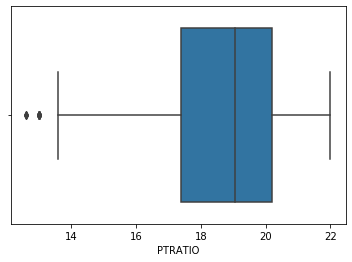

In [23]:
sns.boxplot(df['PTRATIO'])

### PAIRPLOTS

#### We use a pairplot to find out the relationship of MEDV with RM and LSTAT and we find that it has a positive and a negative relationship respectively with variables. It is clearly evident from the accumulation of data points forming a positive sloped & a negative sloped curve if a line is drawn through the dots. This implies that, if the average number of rooms per dwelling is high then the median value of owner-occupied rooms will be high, whereas if there is lower levels of percentage of lower status of the population, then the median value of owner-occupied rooms will be high.
#### To conclude, we can say that if in an area the average number of rooms per dwelling (RM) is high and the percentage of lower status of the population (LSTAT) is low, then the median value of owner-occupied rooms will be high and vice versa.

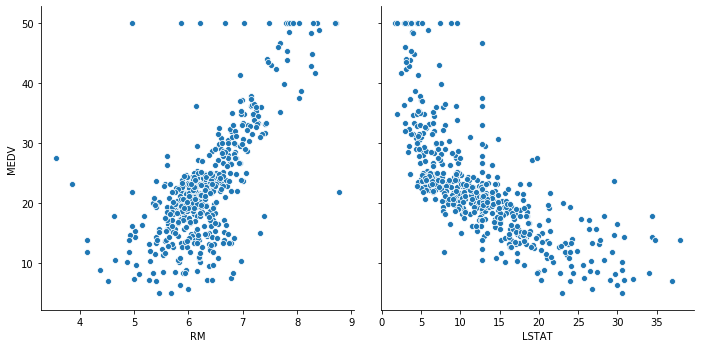

In [24]:
sns.pairplot(df[0:10000], x_vars=['RM', 'LSTAT'], y_vars='MEDV',
             height=5, aspect=1, kind='scatter')

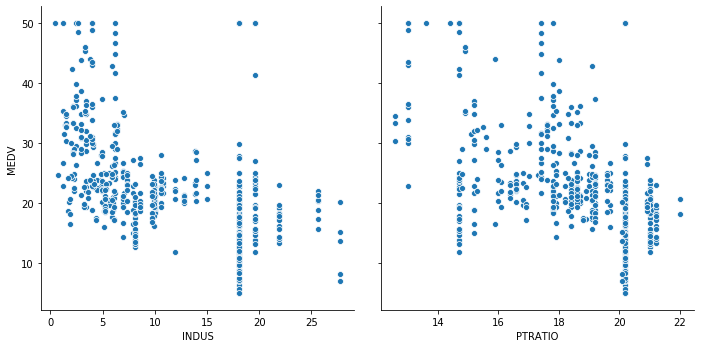

In [25]:
sns.pairplot(df[0:10000], x_vars=['INDUS', 'PTRATIO'], y_vars='MEDV',
             height=5, aspect=1, kind='scatter')

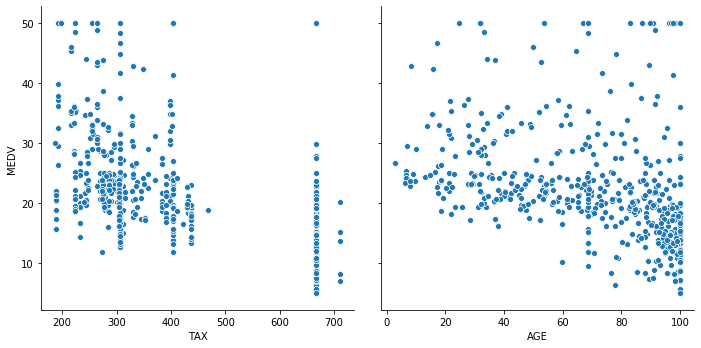

In [26]:
sns.pairplot(df[0:10000], x_vars=['TAX', 'AGE'], y_vars='MEDV',
             height=5, aspect=1, kind='scatter')

#### We look at the relationship of various important factors other than our target variable MEDV with each other.

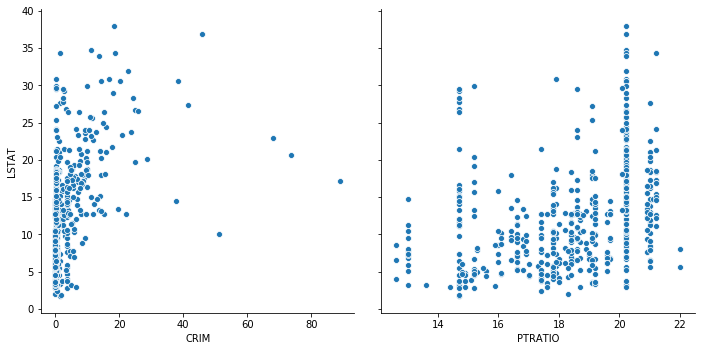

In [27]:
sns.pairplot(df[0:10000], x_vars=['CRIM', 'PTRATIO'], y_vars='LSTAT',
             height=5, aspect=1, kind='scatter')

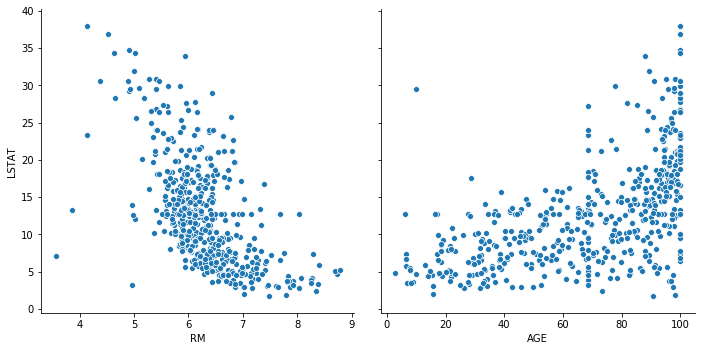

In [28]:
sns.pairplot(df[0:10000], x_vars=['RM', 'AGE'], y_vars='LSTAT',
             height=5, aspect=1, kind='scatter')

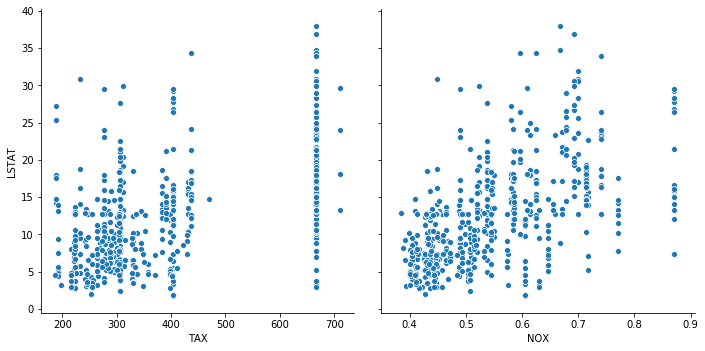

In [29]:
sns.pairplot(df[0:10000], x_vars=['TAX', 'NOX'], y_vars='LSTAT',
             height=5, aspect=1, kind='scatter')

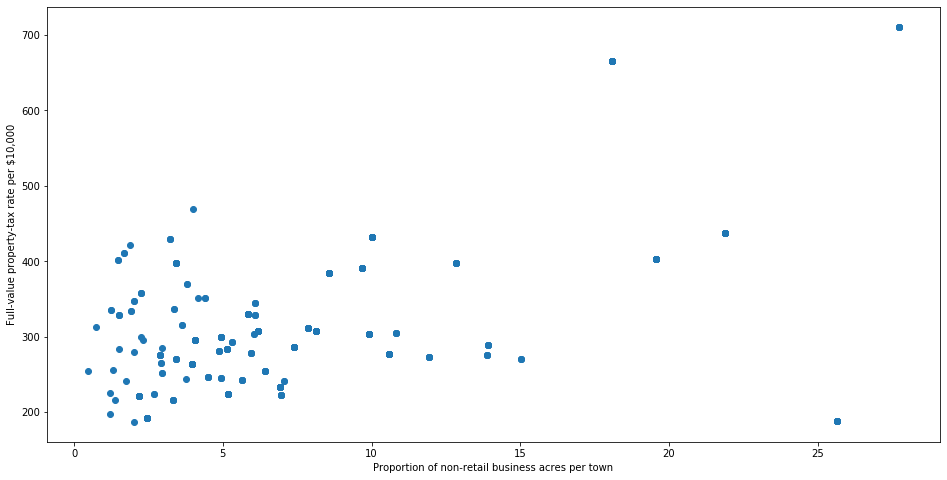

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

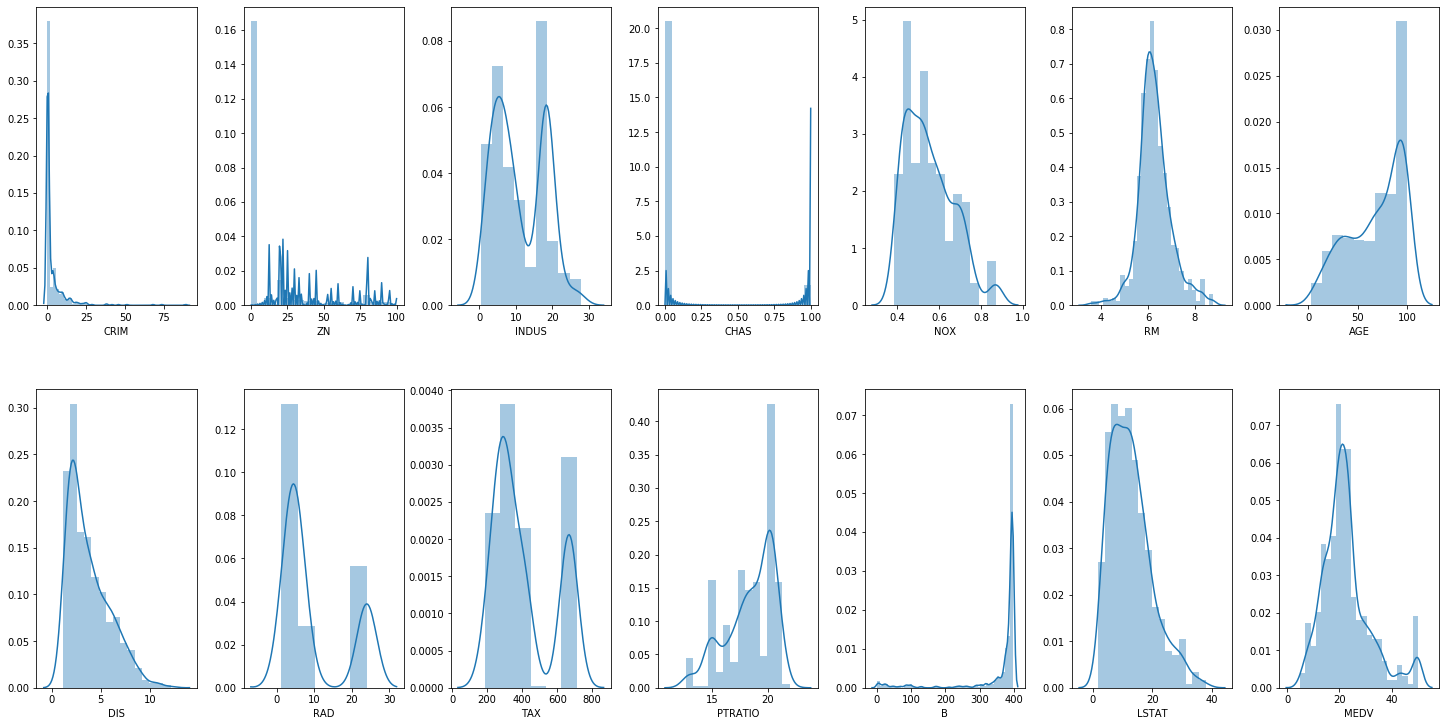

In [31]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Outlier Treatment (only for the relevant variables)
#### For outlier correction we find the interquartile range as given below. We do this to filter the data set and remove the outliers affecting our data set. Inter Quartile Range (IQR) is the difference between the third quartile & first quartile. The outliers are the unusually large & small values lying in the dataset which are below Q1-1.5IQR and above Q3+1.5IQR which implies that these values are situated outside the lower & higher range of the boxplot represented by the end lines.

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
out = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

#### The number of outliers are shown by the sum for each variable. ZN has the highest number of outliers.

In [33]:
out1 = out.sum()
print(out1)

CRIM        64
ZN         126
INDUS        0
CHAS        34
NOX          0
RM          30
AGE          0
DIS          5
RAD          0
TAX          0
PTRATIO     15
B           77
LSTAT       12
MEDV        40
dtype: int64


#### We attempt at capping the variables by creating a 10% quartile for the lower values & a 90% quartile for the higher values.

In [34]:
print(df['MEDV'].quantile(0.10))
print(df['MEDV'].quantile(0.90))

12.75
34.8


#### First we find the skewness without capping the variables & find whether it is symmetric or skewed. To work on the outliers, all the values below 10% quartile is capped at 12.75 & that above the 90% quartile are capped at 34.8. We observe that before capping the variables MEDV is skewed & after the capping of variables the skewness decreases and becomes approximately symmetric.
#### Similarly we can observe the same method for other varibles LSTAT, RM & CRIM. We see that after capping of values lying above 90% & below 10% for outlier detection, the value of skewness decreases for the other variables as well.

In [35]:
df["MEDV"].skew()

1.1080984082549072

In [36]:
df["MEDV"] = np.where(df["MEDV"] <12.75, 12.75,df['MEDV'])
df["MEDV"] = np.where(df["MEDV"] >34.8, 34.8,df['MEDV'])
print(df['MEDV'].skew())

0.49625678161308845


In [37]:
print(df['LSTAT'].quantile(0.10))
print(df['LSTAT'].quantile(0.90))
df["LSTAT"].skew()

4.735
22.81


0.9272911083919

In [38]:
df["LSTAT"] = np.where(df["LSTAT"] <4.735, 4.735,df['LSTAT'])
df["LSTAT"] = np.where(df["LSTAT"] >22.81, 22.81,df['LSTAT'])
print(df['LSTAT'].skew())

0.3947379391546794


In [39]:
print(df['RM'].quantile(0.10))
print(df['RM'].quantile(0.90))
df["RM"].skew()

5.5935
7.1515


0.4036121332887437

In [40]:
df["RM"] = np.where(df["RM"] <5.5935, 5.5935,df['RM'])
df["RM"] = np.where(df["RM"] >7.1515, 7.1515,df['RM'])
print(df['RM'].skew())

0.37253695861433683


In [41]:
print(df['CRIM'].quantile(0.10))
print(df['CRIM'].quantile(0.90))
df["CRIM"].skew()

0.038195
10.014420000000001


5.318369515730374

In [42]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
out = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

#### RM & LSTAT are the significant variables which is of importance to us and thus we are able to successfully remove the outliers for these two variables. Earlier the outliers for RM & LSTAT were 30 & 12 respectively. After the detection, we see that the number of outliers have been reduced to 0. Hence, the outliers have been removed.

In [43]:
out1 = out.sum()
print(out1)

CRIM        64
ZN         126
INDUS        0
CHAS        34
NOX          0
RM           0
AGE          0
DIS          5
RAD          0
TAX          0
PTRATIO     15
B           77
LSTAT        0
MEDV         0
dtype: int64


#### The correlation matrix gives us the same result as before between the variables. There is a strong correlation of MEDV with RM and LSTAT. Also, TAX & RAD are strongly correlated but we do not consider that to avoid multicollinearity. We observe that MEDV has a negative correlation with CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO & LSTAT. Whereas MEDV has a positive relationship with ZN, CHAS, RM, DIS & B. These results are evident from the negative and positive values present in the heatmap. RM has the highest positive value which is 0.7 & LSTAT has the lowest negative value which is -0.79.This implies that these two variables have the strongest impact on our target variable.

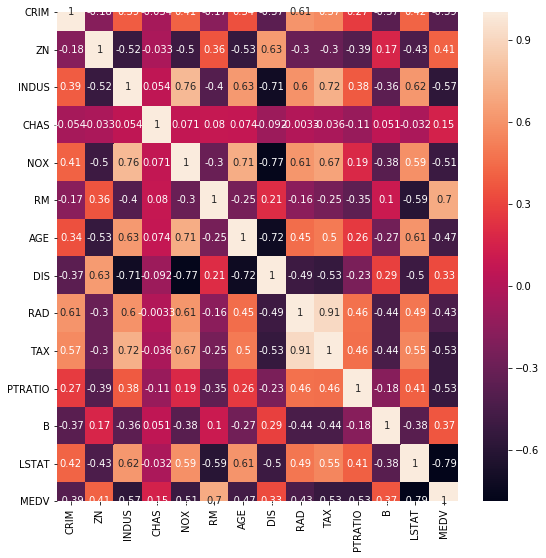

In [44]:
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(), annot = True)

#### Since we have conducted outlier treatment, we will check our results for the presence of any further outliers.
#### Outliers are not prsent for LSTAT and it is also symmetric and follows approximately normal distribution.

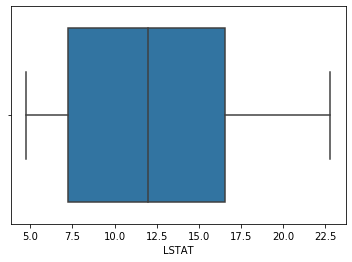

In [45]:
sns.boxplot(df['LSTAT'])

#### Outliers are not present for RM, but it is positively skewed or we can say right tailed. This implies mean > median and observations are accumulated towards left or towards the lower values.

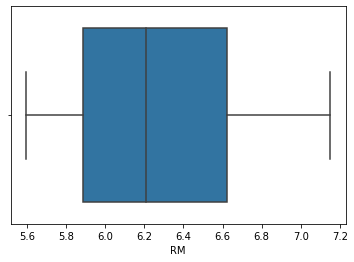

In [46]:
sns.boxplot(df['RM'])

#### Outliers are not present for MEDV, it is symmetric and follows approximately normal distribution.

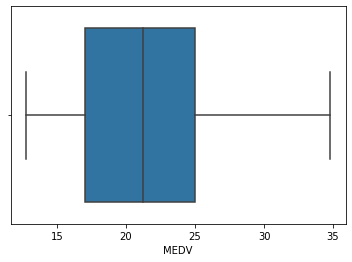

In [47]:
sns.boxplot(df['MEDV'])

#### Outliers are present for PTRATIO due to unusually small values in the dataset. Also, it is negatively skewed or we can say left tailed. This implies mean < median and observations are accumulated towards right or towards the higher values. PTRATIO is not one of the variables which is of importance to us, so even if it has outliers present it does not harm our process.

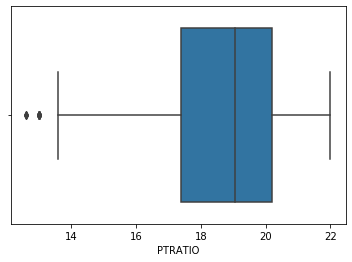

In [48]:
sns.boxplot(df['PTRATIO'])

#### From the pairplot we figure out that MEDV & RM has a direct relationship and MEDV & LSTAT has an inverse relationship from the accumulation of data points. If RM has high (low) values then the impact on MEDV willl also be high (low). Whereas, if LSTAT has high(low) values its impact on MEDV will be low(high). Therefore, if a house has a higher number of rooms for dwelling & a lower % of low status present in the population then an individual will be willing to pay a higher price for that house indicated by high values of MEDV.
#### This implies that if RM is high and LSTAT is low, then MEDV will have a higher value and vice versa.

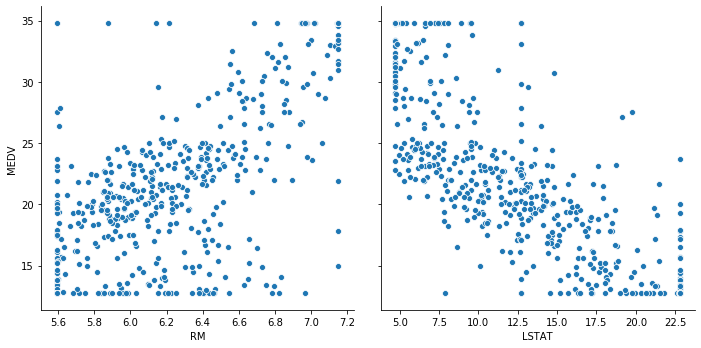

In [49]:
sns.pairplot(df[0:10000], x_vars=['RM', 'LSTAT'], y_vars='MEDV',
             height=5, aspect=1, kind='scatter')

## Linear Regression
#### LR with these 7 factors

In [50]:

df1 = df[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'AGE', 'CRIM', 'MEDV']]

In [51]:
X = df1.loc[:, df1.columns != 'MEDV']
y = df1['MEDV']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### To check the accuracy of the model we split the sample. Here, we are splitting it into 70-30 ratio, 70% of the data set is being trained and 30% data set is tested to see how well the 30% data set predicts the model and it checks the accuracy of the model.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
import statsmodels.api as sm
#Copying the data in case we make mistake in the new fitting
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
# statsmodel.api is better than sklearn as it allows more freedom to change the features
# sm.add_constant This line has to be written for this package. And the OLS line too.
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line code
lm_1 = sm.OLS(y_train,X_train_sm).fit()

C:\Users\Supraja Sriraman\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          1.99e-102
Time:                        22:11:59   Log-Likelihood:                -921.51
No. Observations:                 354   AIC:                             1859.
Df Residuals:                     346   BIC:                             1890.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5540      3.734      2.291      0.0

#### From the summary ouput we can figure out the relationship of the feature varibales with our target variable and whether they are statistically significant or not (if p-value is less than equal to 0.05 then it is statistically significant otherwise not). According to the p-values we see that RM, TAX, PTRATIO & LSTAT are significant variables and INDUS, AGE & CRIM are indignificant variables. We observe that, RM has a positive/direct relationship with our target variable MEDV with a coefficient value of 4.9558 which means that if RM increases(decreases) the value of MEDV will in turn increase(decrease).The coefficient value implies that 1 unit change in RM (average number of rooms for dwelling) will bring approximately 4.9 units change in MEDV. Similar logic is true for the variable AGE. Now we see that LSTAT has a negative/inverse relationship with our target variable MEDV with a coefficient value of -0.4944 (the negative sign shows inverse relation). Thus, if LSTAT increases(decreases) the target variable MEDV in turn decreases(increases). We can also infer that a 1 unit change in LSTAT will result in a 0.49 unit change in MEDV approximately. Similar logic is applicable for other inversely dependent variables INDUS, TAX, PTRATIO & CRIM.
#### R^2 is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.The value of both R square & Adjusted R-squared is fairly high which implies that the model is strong. The value of skewness represents a symmetric distribution.
#### The Durbin-Watson test is a measure of autocorrelation in residuals from regression analysis. It can lead to underestimates of the standard error and can cause you to think predictors are significant when they are not. The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: 2 is no autocorrelation, 0 to <2 is positive autocorrelation & >2 to 4 is negative autocorrelation. Also, values in the range of 1.5-2.5 is normal & not of concern. Thus, in the model we have obtained a value of 1.910, so we are fine.
#### The Jarque-Bera (JB) Test is a test for normality. The test matches the skewness and kurtosis of data to see if it matches a normal distribution. A large J-B value indicates that errors are not normally distributed, as is present in the above results.
#### MEA is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

In [58]:
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lm.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.2680892092144873
R2 score is 0.7576368816045613


The model performance for testing set
--------------------------------------
RMSE is 3.644412239803175
R2 score is 0.7285155631657702


#### We attempt at visualizing the differences between actual prices and predicted values in the testing set. We observe that the differences are not huge and it is a good fit, but a line cannot be fitted for the values and we can look for a better fitted model.

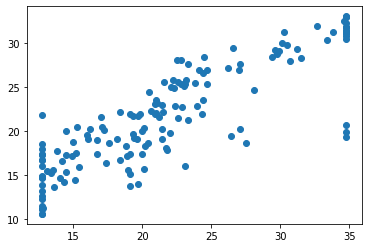

In [59]:
# Visualizing the differences between actual prices and predicted values in the testing set
plt.scatter(y_test, y_test_predict)
plt.show()

#### Again we see that though the fit is good but it would not be able to fit a straight line and hence we can look for a better fitted model.

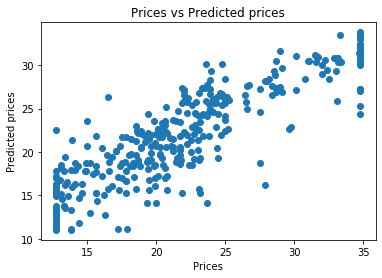

In [60]:
# Visualizing the differences between actual prices and predicted values in the training set
plt.scatter(y_train, y_train_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

#### For a good model there should not be the presence of a relationship between the residuals and predicted values of y in the training set. Here, we see that there is not a significant positive or negative relationship between the two & hence it is a good model.

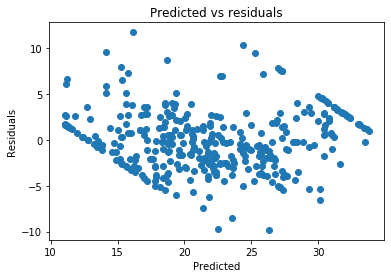

In [61]:
# Visualizing the differences between predicted values and residuals in the training set
plt.scatter(y_train_predict,y_train-y_train_predict)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### One of the assumptions of CLNRM is that of the normality of errors and it can be checked by the normal distribution curve. We observe that the normality of errors is present in the training set but is absent in the testing set.

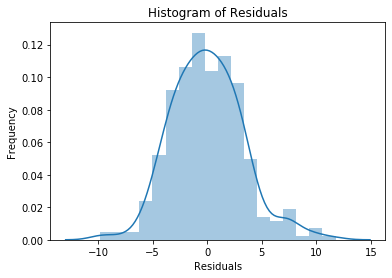

In [62]:
# Checking Normality of errors in training set
# It is normal
sns.distplot(y_train-y_train_predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

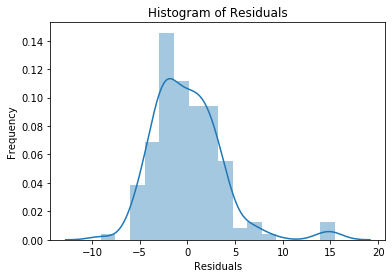

In [63]:
# Checking Normality of errors in testing set
# It is not normal
sns.distplot(y_test-y_test_predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### From the above results, we drop CRIM, AGE and INDUS since they are statistically insignificant variables.
#### We also observe that normality assumption is not being fulfilled in the testing set and a linear line cannot be drawn both in training & testing set, we see a curve but not a well fitted straight line is clear. Therefore, we use polynomial regression model for a better fitted model.

In [64]:
X = X.drop(['CRIM','AGE', "INDUS"], axis = 1)
X

RM  TAX  PTRATIO      LSTAT
0    6.5750  296     15.3   4.980000
1    6.4210  242     17.8   9.140000
2    7.1515  242     17.8   4.735000
3    6.9980  222     18.7   4.735000
4    7.1470  222     18.7  12.715432
..      ...  ...      ...        ...
501  6.5930  273     21.0  12.715432
502  6.1200  273     21.0   9.080000
503  6.9760  273     21.0   5.640000
504  6.7940  273     21.0   6.480000
505  6.0300  273     21.0   7.880000

[506 rows x 4 columns]

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
X_poly

array([[  1.      ,   6.575   , 296.      , ..., 234.09    ,  76.194   ,
         24.8004  ],
       [  1.      ,   6.421   , 242.      , ..., 316.84    , 162.692   ,
         83.5396  ],
       [  1.      ,   7.1515  , 242.      , ..., 316.84    ,  84.283   ,
         22.420225],
       ...,
       [  1.      ,   6.976   , 273.      , ..., 441.      , 118.44    ,
         31.8096  ],
       [  1.      ,   6.794   , 273.      , ..., 441.      , 136.08    ,
         41.9904  ],
       [  1.      ,   6.03    , 273.      , ..., 441.      , 165.48    ,
         62.0944  ]])

In [67]:
print(poly.get_feature_names(X.columns))

['1', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'RM^2', 'RM TAX', 'RM PTRATIO', 'RM LSTAT', 'TAX^2', 'TAX PTRATIO', 'TAX LSTAT', 'PTRATIO^2', 'PTRATIO LSTAT', 'LSTAT^2']


In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, train_size=0.7, random_state=100)
poly.fit(X_poly, y) 

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [69]:
lm2 = LinearRegression() 
lm2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
X_train_sm2 = X_train2
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
# statsmodel.api is better than sklearn as it allows more freedom to change the features
# sm.add_constant This line has to be written for this package. And the OLS line too.
X_train_sm2 = sm.add_constant(X_train_sm2)
# create a fitted model in one line code
lm_2 = sm.OLS(y_train2,X_train_sm2).fit()

In [71]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     135.2
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          2.75e-129
Time:                        22:12:02   Log-Likelihood:                -838.87
No. Observations:                 354   AIC:                             1708.
Df Residuals:                     339   BIC:                             1766.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2776     51.504      1.869      0.0

In [72]:
y_train_predict2 = lm2.predict(X_train2)
rmse2 = (np.sqrt(mean_squared_error(y_train2, y_train_predict2)))
r2_2 = r2_score(y_train2, y_train_predict2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2_2))
print("\n")

# model evaluation for testing set

y_test_predict2 = lm2.predict(X_test2)
# root mean square error of the model
rmse2 = (np.sqrt(mean_squared_error(y_test2, y_test_predict2)))

# r-squared score of the model
r2_2 = r2_score(y_test2, y_test_predict2)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2_2))

The model performance for training set
--------------------------------------
RMSE is 2.6062963196513933
R2 score is 0.8458561126245722


The model performance for testing set
--------------------------------------
RMSE is 2.96238469378966
R2 score is 0.8206204809263791


#### We use polynomial regression of degree 2 to be able to fit the model better. As a first step, we drop the statistically insignificant variables INDUS, AGE & CRIM and we are left with RM, LSTAT, TAX & PTRATIO. Now, we again split the data set into 70-30 ratio, we train the 70% data and test the 30% data set to check the accuracy of the model,i.e., how well the model fits.
#### We see that R2 values have increased and are closer to 1 whereas RMSE values have decreased to a great extent indicating low variance, thus this is a better fitted model.
#### After carrying out the polynomial regression model we clearly see from the graphs that a straight line can be drawn for actual prices & predicted values in both training & testing set so that differences between the two is minimised. Also, there is no relationship between predicted values & residuals which backs up the fact that it is a good model. The assumption of normality is also fulfilled in both training & testing sets since we see the presence of a normal curve in both the sets.

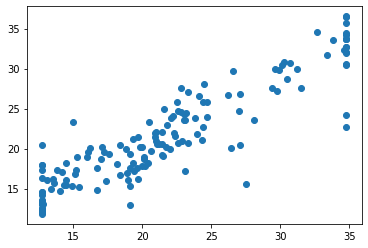

In [73]:
# Visualizing the differences between actual prices and predicted values in the testing set
plt.scatter(y_test2, y_test_predict2)
plt.show()

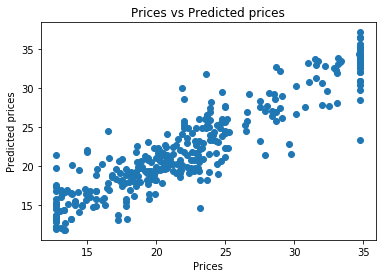

In [74]:
# Visualizing the differences between actual prices and predicted values in the training set
plt.scatter(y_train2, y_train_predict2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

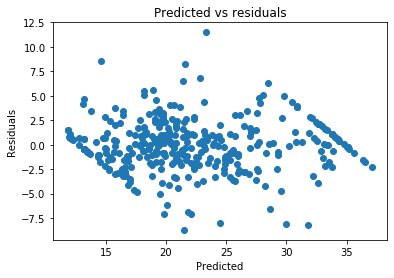

In [75]:
# Visualizing the differences between predicted values and residuals in the training set
plt.scatter(y_train_predict2,y_train2-y_train_predict2)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

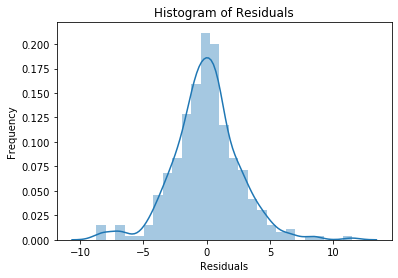

In [76]:
# Checking Normality of errors in training set
# It is normal
sns.distplot(y_train2-y_train_predict2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

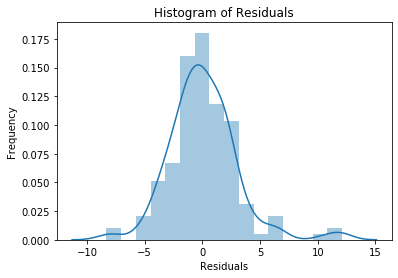

In [77]:
# Checking Normality of errors in testing set
# It is normal
sns.distplot(y_test2-y_test_predict2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import tree # tree scope contains the classifier

# Decision Tree


#### Decision tree is a supervised learning algorithm used in decision making process. 
#### It is a popular technique since it works for both categorical and continuous input variables. 

#### The target variable in our case is a continuous variable
#### So, the decision tree is Continuous Variable Decision Tree or a Regression Tree. 

In [79]:
from sklearn.model_selection import train_test_split

train_x = df.drop(['MEDV'],axis=1)
train_y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, train_size=0.7 , random_state=100)

#### Dividing data into train and test dataset.
#### The model is split into two parts - train and test, which are mutually exclusive. 
#### It is trained on the 'train' dataset and the performance of the model is checked on the 'test' dataset.

In [80]:
#Import Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 12)

#### One disadvantage of the decision tree is it can overfit the model. 
#### If there is no limit set on the decision tree, it will give 100% accuracy on training set but the accuracy will be very low on the testing set.
#### We have controlled for this by setting a limit on the maximum vertical depth of the tree.


#### Out of all possible depths of the tree, setting depth = 12 minimised the mean squared error. 
#### Hence, we set a limit on the tree by limiting its depth to 12. 
#### Any depth lower or greater than 12 increased the error term (mse). 

In [81]:
#Train the model using the training sets
dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3.5207419330169833

#### The RMSE is greater than that obtained by using regression.
#### Hence we can say that the regression is a better fit to the model than the decision tree. 

In [83]:
dt_score = dt.score(X_train, y_train)
print('coefficient of determination R^2 of the train set.: ',dt_score)

coefficient of determination R^2 of the train set.:  0.9895768502798437


In [84]:
dt_score = dt.score(X_test, y_test)
print('coefficient of determination R^2 of the test set.: ',dt_score)

coefficient of determination R^2 of the test set.:  0.7466281684437338


#### R squared of the train set is close to 1 while that of the test set is also quite high. 

C:\Users\Supraja Sriraman\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


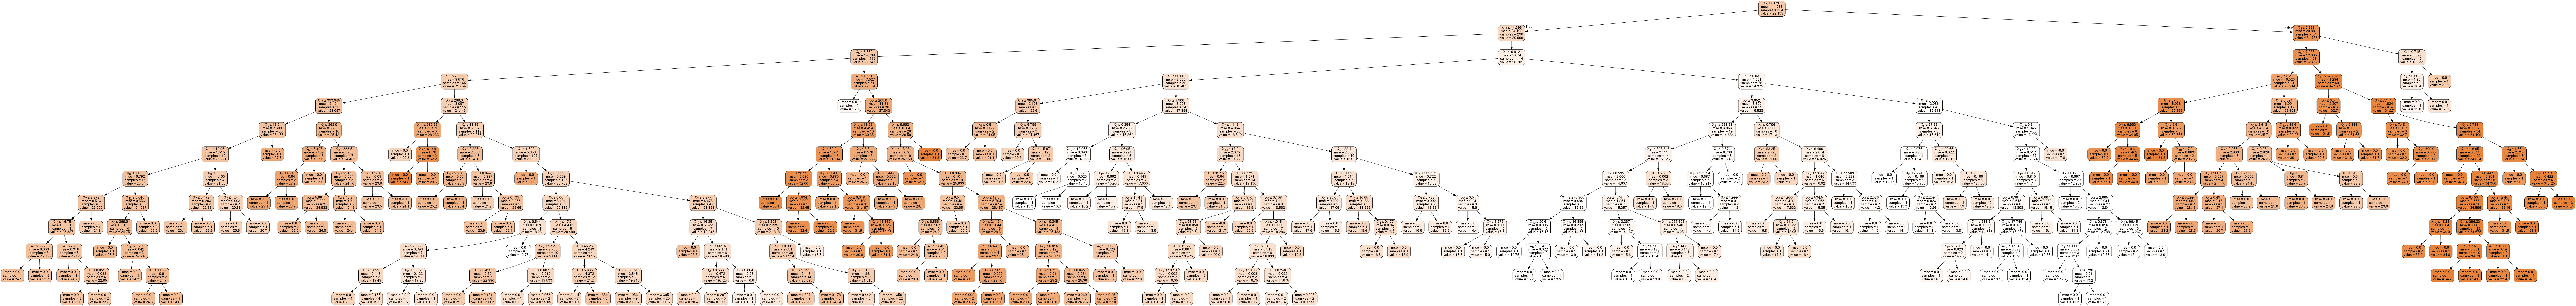

In [85]:
# Ploting Tree

import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graphviz.Source(graph)  
Image(graph.create_png()) 

#### This tree works on the principle of reduction of variance.
#### The variance of each node is calculated and the variance for each split is then calculated as the weighted average of each node variance.
#### The split with lower variance is then selected as the criteria to split the population.


In [86]:
y_predicted = dt.predict(X_test)

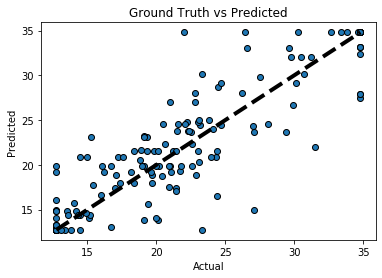

In [87]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### We see that R2 values are high for the tree but the RMSE and MSE values are also high compared to other models. 
#### The decision tree doesn't fit the data very well as can be seen from the graph above. 

## Random Forest Regressor
#### The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

#### Train the model

In [88]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

C:\Users\Supraja Sriraman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [90]:
from sklearn import metrics

In [91]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9698004476029178
Adjusted R^2: 0.9686457588347941
MAE: 0.76183615819209
MSE: 1.3308275423728806
RMSE: 1.15361498879517


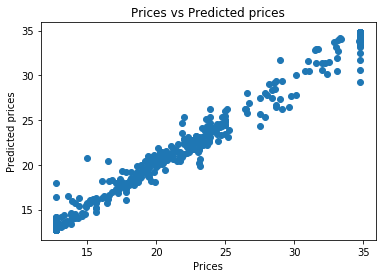

In [92]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

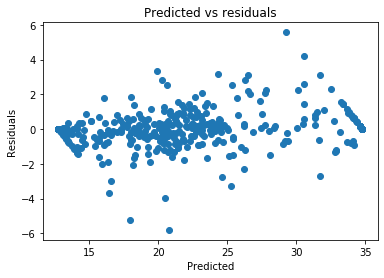

In [93]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [94]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [95]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8236616441342649
Adjusted R^2: 0.8070500598860435
MAE: 2.103585526315789
MSE: 8.626941282894734
RMSE: 2.9371655184709518


#### From Random Forest Regressor we observe that the RMSE is slightly higher for the testing set and R^2 & adjusted R^2 are also higher for the training set. The actual vs predicted prices graph fits a straight line and there is no relationship between residuals & predicted prices. Therefore, training set gives a better prediction of the model.

In [96]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [97]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\Supraja Sriraman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [98]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

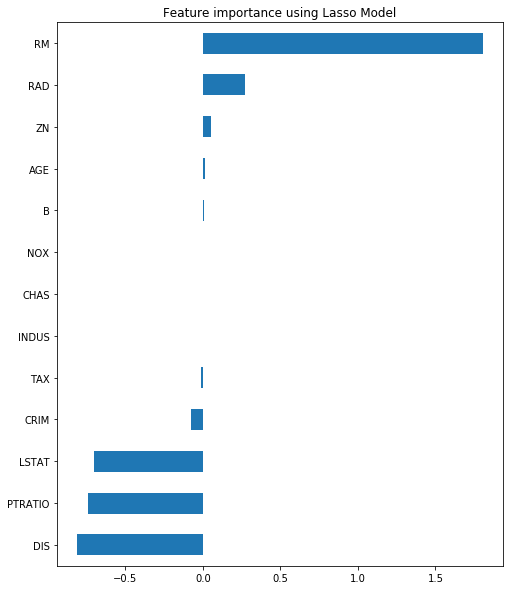

In [99]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Embedded methods are iterative in a sense that it takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
#### We have performed feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.
#### The above figure lists the features in decreasing order of selection, which implies RM has the highest contribution.